In [1]:
import sys, os
import sklearn
import numpy as np
import pandas as pd
import pickle
import re

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

import unicodedata
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [3]:
np.random.seed(3367)
tf.random.set_seed(3367)
!pip install -U ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo
# fetch dataset "Drug reviews"
drug_review_dataset_drugs_com = fetch_ucirepo(id=462)

# data (as pandas dataframes)
X = drug_review_dataset_drugs_com.data.features
y = drug_review_dataset_drugs_com.data.targets

# metadata
print(drug_review_dataset_drugs_com.metadata)

# variable information
print("\n", drug_review_dataset_drugs_com.variables)

{'uci_id': 462, 'name': 'Drug Reviews (Drugs.com)', 'repository_url': 'https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com', 'data_url': 'https://archive.ics.uci.edu/static/public/462/data.csv', 'abstract': 'The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Text'], 'num_instances': 215063, 'num_features': 6, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5SK5S', 'creators': ['Surya Kallumadi', 'Felix Grer'], 'intro_paper': {'title': 'Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning', 'authors': 'F. Grä

In [7]:
print(X.head(), y) # y is NoneType--> no targets

                   drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37   None


In [8]:
X.review[:5]

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [9]:
X.review[0]

'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

In [10]:
# Create vocabulary for the corpus
text_5 = X.head()['review'].apply(lambda x: x.strip('"').lower())
tok_5 = keras.preprocessing.text.Tokenizer(char_level=False) #parse (tokenize) on a word level (not character level)
tok_5.fit_on_texts(text_5)

In [11]:
text_all = X.review.apply(lambda x: x.strip('"').lower())
tok_all = keras.preprocessing.text.Tokenizer(char_level=False)
tok_all.fit_on_texts(text_all)

In [12]:
#encoding rules example
tok_all.sequences_to_texts([[2,8,10,4,18,13]])

['and 039 was to had on']

In [13]:
#number of unique words, number of unique sentences
uni_w = len(tok_all.word_index)
uni_s = tok_all.document_count
print((uni_w, uni_s))

(53635, 215063)


In [14]:
#remove number and special characters
tok = keras.preprocessing.text.Tokenizer(char_level=True)
tok.fit_on_texts(text_all)
tok.word_index

{' ': 1,
 'e': 2,
 't': 3,
 'i': 4,
 'a': 5,
 'o': 6,
 'n': 7,
 's': 8,
 'r': 9,
 'd': 10,
 'h': 11,
 'l': 12,
 'm': 13,
 'c': 14,
 'y': 15,
 'u': 16,
 'g': 17,
 'f': 18,
 'w': 19,
 'p': 20,
 '.': 21,
 'b': 22,
 'v': 23,
 'k': 24,
 ',': 25,
 '0': 26,
 '3': 27,
 ';': 28,
 '&': 29,
 '9': 30,
 '#': 31,
 'x': 32,
 '1': 33,
 '2': 34,
 '!': 35,
 'j': 36,
 'z': 37,
 '5': 38,
 '\n': 39,
 '-': 40,
 'q': 41,
 '4': 42,
 ')': 43,
 '(': 44,
 '6': 45,
 '/': 46,
 '7': 47,
 '8': 48,
 ':': 49,
 '?': 50,
 '%': 51,
 '$': 52,
 '+': 53,
 '*': 54,
 '=': 55,
 '@': 56,
 '~': 57,
 ']': 58,
 '[': 59,
 '`': 60,
 '️': 61,
 '_': 62,
 '\\': 63,
 '❤': 64,
 '^': 65,
 '}': 66,
 '{': 67,
 '\u200b': 68,
 '\t': 69,
 '☺': 70,
 'і': 71,
 '|': 72,
 '♡': 73,
 '،': 74,
 '☹': 75,
 '⭐': 76,
 'ツ': 77,
 '⚠': 78,
 '�': 79,
 '℃': 80,
 '✌': 81,
 '\x11': 82,
 '♀': 83,
 '►': 84,
 '\x7f': 85,
 'ł': 86,
 '℅': 87,
 '✅': 88,
 '̇': 89}

In [15]:
#cleaning function, to remove numbers and non-english letters from the corpus
def only_alpha_num(text):
  x = ' '.join(map(lambda x: x.strip().lower(), text.split('\n'))).strip()
  x = x.replace('&#039;', ' a')
  x = re.sub('[^a-z ]',' ', x) #leaves only letters
  x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8')

  return x

In [17]:
X.review.tail()[-3:]

215060    "I&#039;m married, 34 years old and I have no ...
215061    "I was prescribed Nucynta for severe neck/shou...
215062                                        "It works!!!"
Name: review, dtype: object

In [18]:
X.review.tail()[-3:].apply(only_alpha_num)

215060     i am married     years old and i have no kids...
215061     i was prescribed nucynta for severe neck shou...
215062                                         it works    
Name: review, dtype: object

In [19]:
X['clean_rev'] = X['review'].apply(only_alpha_num)
tok_clean = keras.preprocessing.text.Tokenizer(char_level=False)
tok_clean.fit_on_texts(X['clean_rev'])

In [21]:
uni_w = len(tok_clean.word_index)      # number of distinct "words"
uni_s= tok_clean.document_count # total number of sentences

print((uni_w, uni_s)) #number of unique words is reduced
# numbers and characters that couldn't be represented by ascii were thrown out

(50071, 215063)


In [23]:
# check the remaining characters in the cleaned corpus
tok_clean = keras.preprocessing.text.Tokenizer(char_level=True)
tok_clean.fit_on_texts(X['clean_rev'])
tok_clean.word_index.keys() #only english letters (no mess)

dict_keys([' ', 'e', 't', 'a', 'i', 'o', 'n', 's', 'r', 'd', 'h', 'l', 'm', 'c', 'y', 'u', 'g', 'f', 'w', 'p', 'b', 'v', 'k', 'x', 'j', 'z', 'q'])

In [25]:
#total number of each numerical rating in review dataset
Xr = X.rating.value_counts()
Xr.sort_index()

rating
1     28918
2      9265
3      8718
4      6671
5     10723
6      8462
7     12547
8     25046
9     36708
10    68005
Name: count, dtype: int64

Text(0, 0.5, 'Rating Frequency')

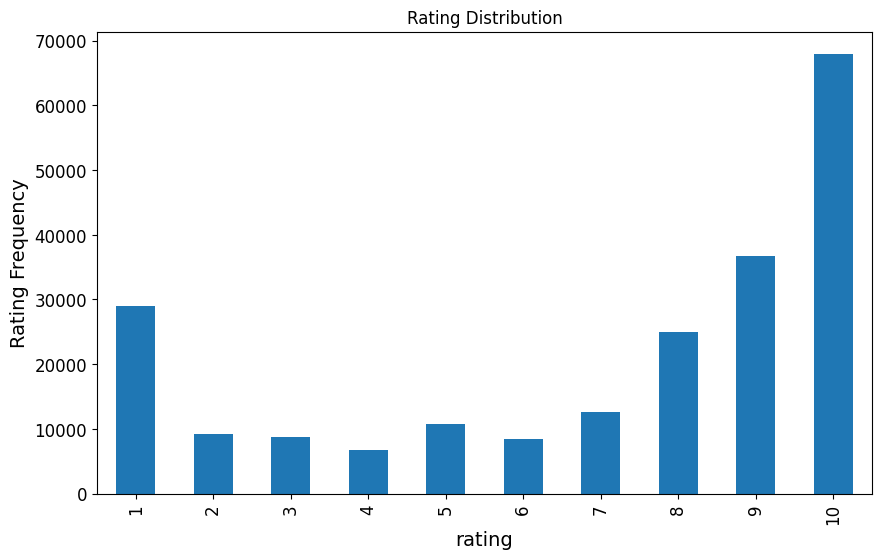

In [26]:
#visualize the rating distribution
temp = Xr.sort_index()
plt.figure(figsize=(10,6))
temp.plot(kind='bar', title='Rating Distribution')
plt.ylabel('Rating Frequency')

In [27]:
#create the new 'target' feature for supervised learning (rating prediction based on cleaned reviews)
X['target'] = X.rating.apply(lambda x: 1 if x>5 else 0) # the rating scale is collapsed into two bins
X.target.value_counts()

target
1    150768
0     64295
Name: count, dtype: int64

In [28]:
pd.crosstab(X.drugName, X.target)

target,0,1
drugName,,
A + D Cracked Skin Relief,0,1
A / B Otic,0,2
Abacavir / dolutegravir / lamivudine,13,57
Abacavir / lamivudine,0,3
Abacavir / lamivudine / zidovudine,0,1
...,...,...
ZzzQuil,3,0
depo-subQ provera 104,1,1
ella,20,51


In [30]:
#make sure that there is an equal amount of observations and targets
X['clean_rev'].shape, X['target'].shape

((215063,), (215063,))

In [31]:
#split the data into training and testing sets
X_tr, X_tst, y_tr, y_tst = train_test_split(X['clean_rev'], X['target'], test_size=0.15, random_state=3367)


In [32]:
#split the training data into validation and training
X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.2, random_state=3367)


In [34]:
#create tensors for model training
raw_train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train))
raw_valid_set = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
raw_test_set = tf.data.Dataset.from_tensor_slices((X_tst, y_tst))


In [38]:
#shuffle to improve generalization (inference) and prefetch for optimization during training (quicker train)
tf.random.set_seed(3367)
train_set = raw_train_set.shuffle(5000, seed=3367).batch(32).prefetch(1)
valid_set = raw_valid_set.batch(32).prefetch(1)
test_set = raw_test_set.batch(32).prefetch(1)

In [39]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [41]:
#create the input layer for the model
vocab_size = 1000
text_vec_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size)
text_vec_layer.adapt(train_set.map(lambda reviews, labels: reviews))


In [42]:
#size of the first layer
len(text_vec_layer.get_vocabulary())

1000

In [45]:
embed_size = 128
tf.random.set_seed(3367)
#define model
model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Embedding(vocab_size, embed_size, mask_zero=True),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
history = model.fit(train_set, validation_data=valid_set, epochs=2)

Epoch 1/2
4571/4571 [==============================] - 104s 21ms/step - loss: 0.3898 - accuracy: 0.8237 - val_loss: 0.3461 - val_accuracy: 0.8475
Epoch 2/2
4571/4571 [==============================] - 74s 16ms/step - loss: 0.3211 - accuracy: 0.8589 - val_loss: 0.3144 - val_accuracy: 0.8613


In [46]:
history.history

{'loss': [0.38976675271987915, 0.3211095929145813],
 'accuracy': [0.8236553072929382, 0.8589392900466919],
 'val_loss': [0.34606507420539856, 0.31435707211494446],
 'val_accuracy': [0.8475151062011719, 0.8613002896308899]}

In [47]:
dir_models=''
history.model.save(dir_models+'drugs.tf')

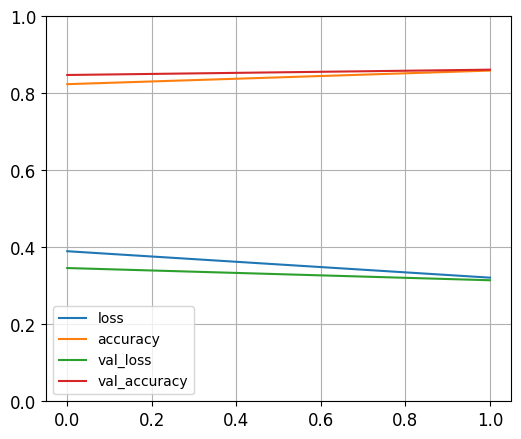

In [48]:
pd.DataFrame(history.history).plot(figsize=(6,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()